In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set font to Times New Roman
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams.update({
    'text.usetex': True,
    'font.family': 'serif',
    'font.serif': ['Times New Roman'],  # or 'Times'
    'text.latex.preamble': r'\usepackage{mathptmx}',  # Times in LaTeX
})

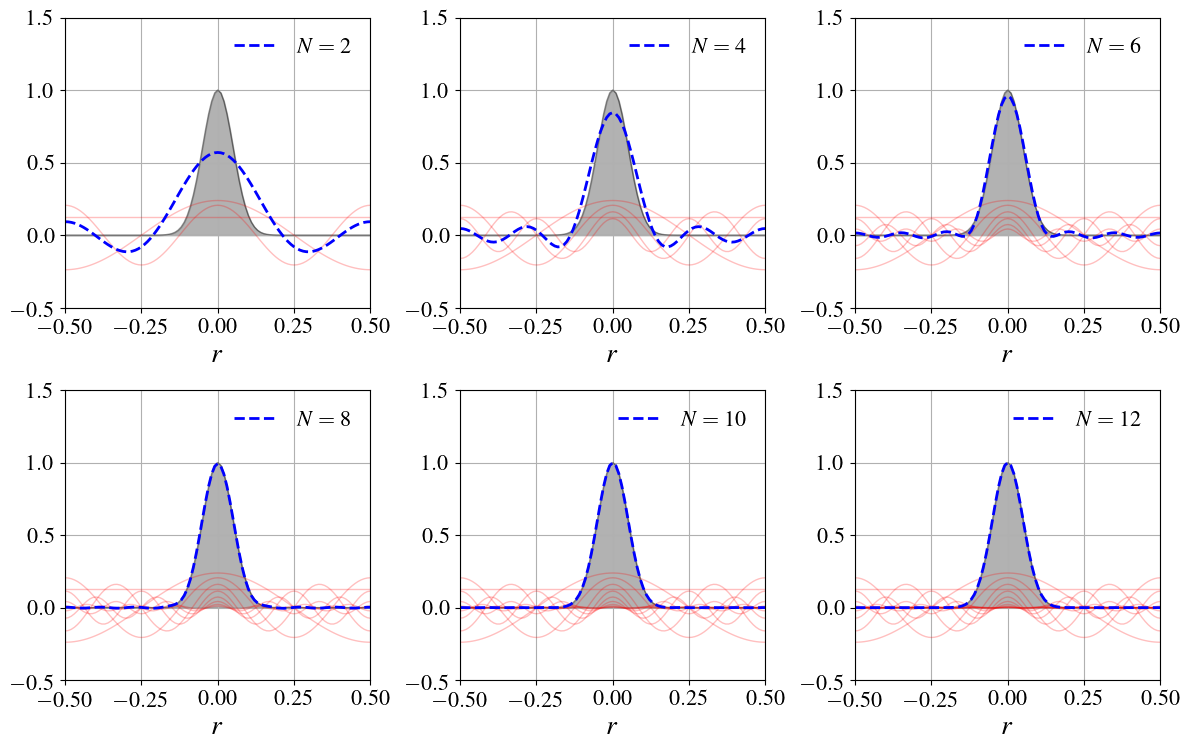

In [9]:
# Define x and the original Gaussian function
x = np.linspace(-0.5, 0.5, 101)
sigma = 0.05
L = 0.5
y = np.exp(-x**2 / (2 * sigma**2))

# Function to compute Fourier cosine series
def compute_fourier_terms(x, y, N_terms, L):
    a0 = np.trapz(y, x) / L
    series = [a0 / 2 * np.ones_like(x)]
    for n in range(1, N_terms + 1):
        cos_n = np.cos(n * np.pi * x / L)
        an = np.trapz(y * cos_n, x) / L
        series.append(an * cos_n)
    return series

# Setup plot
fig = plt.figure(figsize=(12, 8))
N_list = [2, 4, 6, 8, 10, 12]

for i, N in enumerate(N_list):
    ax = fig.add_subplot(2, 3, i + 1)
    
    # Compute individual Fourier terms and sum
    terms = compute_fourier_terms(x, y, N, L)
    y_approx = np.sum(terms, axis=0)

    # Plot original as gray transparent
    ax.plot(x, y, color='k', linewidth=1, alpha=0.4)
    # Filled gray background for original function
    ax.fill_between(x, y, color='gray', alpha=0.6)

    # Plot each term in red
    for j, term in enumerate(terms):
        if j == 0:
            label = r'$a_0/2$'
        else:
            label = fr'$a_{j} \cos({j}\pi x / L)$'
        ax.plot(x, term, 'r-', linewidth=1, alpha=0.25)

    # Plot reconstructed function
    ax.plot(x, y_approx, 'b--', linewidth=2, label=r'$N={:}$'.format(N))

    ax.grid(True)
    ax.set_ylim(-0.5, 1.5)
    ax.set_xlim(-0.5, 0.5)
    ax.set_xticks([-0.5, -0.25, 0, 0.25, 0.5])
    ax.set_yticks([-0.5, 0, 0.5, 1, 1.5])
    ax.tick_params(labelsize=16)
    ax.legend(fontsize=16, loc='upper right', frameon=False)
    ax.set_xlabel(r'$r$', fontsize=20)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()